In [2]:
%plot inline -w 700 -h 600
function plot_tangent(point,k,limits)
     x=linspace(limits(1),limits(2),100);
     plot(x,point(2)+k.*(x-point(1)),"linewidth",5);
     hold on;
endfunction
function plot_function(interval,fun)
    a=interval(1);
    b=interval(2);
    x=linspace(a,b,300);
    y1=feval(fun,x);
    plot(x,y1,"linewidth",5);
    set(gca, "linewidth", 4, "fontsize", 12)
endfunction
function [errors,sub_intervals]=calculate_error(x0,fun,min_st_size,method,solution)
    step = 1;
    errors=[];
    sub_intervals=[];
    index = 1;
    while(step >= min_st_size)
        y = feval(method,x0,step,fun);
        errors(index) = abs(solution-y);
        sub_intervals(index) = step;
        step = step / 2;
        index = index + 1;
    end
    plot(1:index-1,errors,"linewidth",10);
    xlabel('Indeks i gresaka, za koji vazi: h=1/2^{i-1}. Npr. za i=1 je h=1, za i=2 je h=1/2 itd.');
    ylabel('Greska');
    set(gca, "fontsize", 14);
endfunction

# Numeričko diferenciranje
#### Cilj nam je da izvod u tački odredimo numerički, a ne simbolički.
#### Numeričke metode za određivanje izvoda mogu da se koriste kada je izvod funkcije teško odrediti analitički ili kada nemamo simbolički oblik funkcije već su nam samo date njene tačke. 
#### Na primer, možemo da imamo podatke od pređenom putu po vremenu za neki objekat, a cilj nam je da odredimo njegovu brzinu i ubrzanje.
#### Recimo da imamo primer objekta koji je u slobodnom padu koji smo obrađivali ranije. Pokušaćemo da krenemo od pređenog puta i da otkrijemo brzinu i ubzranje.
#### Znamo da je prvi izvod promene položaja tela ustvari brzina tela. Cilj nam je odredimo prvi izvod na osnovu tabelarnih podataka.

In [3]:
function F=calculate_force(m,c,v)
%g (gravitational constant) = 9.8 m/s² (in the negative y direction)
%m (mass of body)
%C (drag constant)
%v (velocity of body)
    g=9.8;
    Fd=c*v^2; %F drag
    Fg=m*g; %F gravity
    F=Fg-Fd;
endfunction

function [time velocity height]=simulate(m,c,v0,h0,t0,t1,step)
    time = t0:step:t1;
    n = length(time);
    velocity = zeros(1,n);
    height = zeros(1,n);
    height(1) = h0;
    velocity(1) = v0;
    for i=2:n
        F = calculate_force(m,c,velocity(i-1));
        velocity(i) = velocity(i-1) + step*F/m;
        height(i) = height(i-1) - step*velocity(i);
    end
endfunction

#### Uzećemo promenu položaja u prvih 10 koraka. Vrednost koeficijenta trenja namerno je postavljena na 0 da bi kasnije u toku predavanja pokazali kako izgleda ubrzanje.

In [4]:
m = 1; %kg
%c = 0.015; %kg/m
c = 0; %kg/m
h0 = 100; %m
v0 = 0; %m/s
step = 1; %s
t0 = 0;
t1 = 4;
[time velocity height]=simulate(m,c,v0,h0,t0,t1,step)

time =

   0   1   2   3   4

velocity =

    0.00000    9.80000   19.60000   29.40000   39.20000

height =

   100.0000    90.2000    70.6000    41.2000     2.0000



#### Crtamo grafik promene položaja

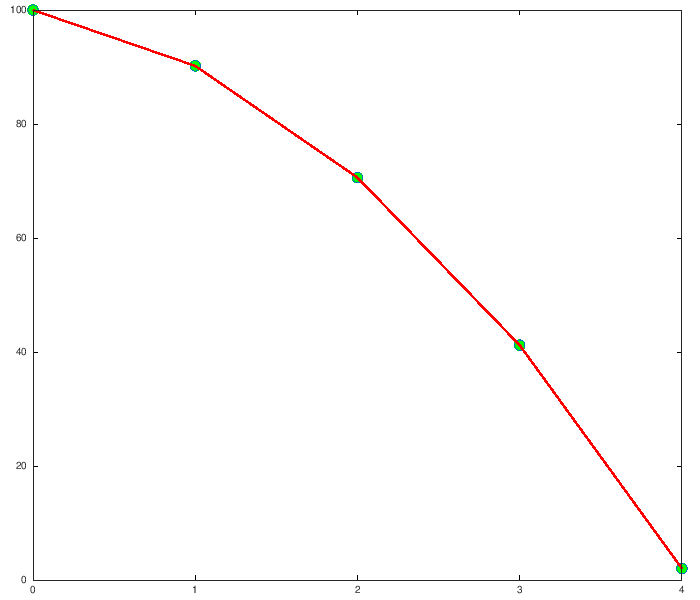

In [5]:
plot(time,height,'o','markersize', 10,'markerfacecolor','g');
hold on;
xp=t0:0.01:t1;
plot(time,height,"linewidth", 5,"color", "red");

#### Crtamo grafik promene brzine

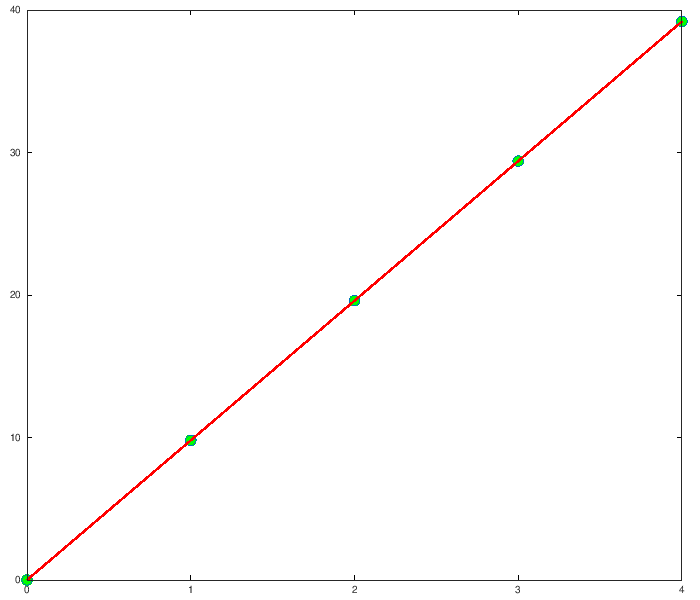

In [6]:
plot(time,velocity ,'o','markersize', 10,'markerfacecolor','g');
hold on;
xp=t0:0.01:t1;
plot(time,velocity ,"linewidth", 5,"color", "red");

#### Vrednosti promene položaja su sledeće:
#### $t=(0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9)$
#### $visina=(100.0,99.9,99.7,99.4,99.0,98.5,97.9,97.2,96.5,95.6)$
#### Kod koji je dat u nastavku prolazi kroz niz $visina$ i računa tzv. konačne razlike, konkretno $razliku$ $unapred$:
#### $$brzina_i=\frac{visina_{i+1}-visina_i}{\Delta{t}}$$
#### gde je $\Delta{t}$ vremenski korak koji je u ovom slučaju 0.1. Razlika unapred je numerička aproksimacija prvog izvoda.

In [7]:
n=length(height);
step=1;
diff=zeros(1,n-1);
for i=1:n-1
    h_now=height(i);
    h_next=height(i+1);
    diff(i)=(h_next-h_now)/step;
end
diff
velocity

diff =

   -9.8000  -19.6000  -29.4000  -39.2000

velocity =

    0.00000    9.80000   19.60000   29.40000   39.20000



#### Vidimo da se naša aproksimacija poklapa sa stvarnim vrednostima brzine.

## Konačne razlike
#### Videli smo da, pomoću konačnih razlika, možemo uspešno da aproksimiramo izvod iz tabelarnih podataka. U nastavku se detaljno bavimo konačnim razlikama.
#### Podsetimo se prvo na koji način se definiše prvi izvod funkcije:
#### $$\frac{df}{dx}=\lim_{h\to 0} \frac{f(x+h)-f(x)}{h}$$
#### Rešavanjem limesa dobija se prvi izvod u simboličkom obliku. 
#### Pomoću numeričkog diferenciranja ne možemo da odredimo prvi izvod u simboličkom obliku, ali možemo da odredimo vrednost prvog izvoda u proizvoljnoj tački $x_0$:
#### $$f'(x_0)=?$$
#### Na primer, numeričko diferenciranje može da reši sledeći problem:
#### $$f'(2^x)=?\\x=0.2$$
### Tejlorov red
#### Osnova za sve formule za numeričko difernciranje biće nam Tejlorov red. Ako uzmemo da je $x=x_0+h$, Tejlorov red ima sledeći oblik:
#### $$f(x_0+h)=f(x_0)+f'(x_0)h+\frac{1}{2}f''(x_0)h^2+\frac{1}{3!}f^{(3)}(x_0)h^3+...$$
### Konačne razlike za prvi izvod
### Razlika unapred
#### Kod razlike unapred da bi odredili izvod u nekoj tački $x_0$ koristimo tačku $x_0+h$, gde je $h$ proizvoljno odabrani korak.
#### Razliku unapred izvodimo na sledeći način:
#### $$f(x_0+h)=f(x_0)+f'(x_0)h+\frac{1}{2}f''(x_0)h^2$$
#### $$f(x_0+h)-f(x_0)=f'(x_0)h+\frac{1}{2}f''(x_0)h^2$$
#### $$f'(x_0)=\frac{f(x_0+h)-f(x_0)}{h}+\frac{1}{2}f''(x_0)h$$
#### Što nam daje formulu:
#### $$f'(x_0)=\frac{f(x_0+h)-f(x_0)}{h}+O(h)$$
#### Izvešćemo sada još dve formule, pa ćemo onda ih onda sve zajdeno dalje obraditi.
### Razlika unazad
#### Kod razlike unazad da bi odredili izvod u nekoj tački $x_0$ koristimo tačku $x_0-h$, gde je $h$ proizvoljno odabrani korak.
#### Razliku unazad izvodimo na sledeći način:
#### $$f(x_0-h)=f(x_0)-f'(x_0)h+\frac{1}{2}f''(x_0)h^2$$
#### $$f(x_0-h)-f(x_0)=-f'(x_0)h+\frac{1}{2}f''(x_0)h^2$$
#### $$f'(x_0)=\frac{f(x_0)-f(x_0-h)}{h}-\frac{1}{2}f''(x_0)h$$
#### Što nam daje formulu:
#### $$f'(x_0)=\frac{f(x_0)-f(x_0-h)}{h}+O(h)$$
### Centralna razlika
#### Kod centralne razlike da bi odredili izvod u nekoj tački $x_0$ koristimo tačke $x_0-h$ i $x_0-h$, gde je $h$ proizvoljno odabrani korak.
#### Centralnu razliku izvodimo na sledeći način:
#### $$f(x_0+h)=f(x_0)+f'(x_0)h+\frac{1}{2}f''(x_0)h^2+\frac{1}{6}f^{(3)}(x_0)h^3$$
#### $$f(x_0-h)=f(x_0)-f'(x_0)h+\frac{1}{2}f''(x_0)h^2-\frac{1}{6}f^{(3)}(x_0)h^3$$
#### Oduzimamo predhodna dva Tejlorova razvoja:
#### $$f(x_0+h)-f(x_0-h)=2f'(x_0)h+2\frac{1}{6}f^{(3)}(x_0)h^3$$
#### $$f'(x_0)=\frac{f(x_0+h)-f(x_0-h)}{2h}+2\frac{1}{6}f^{(3)}(x_0)h^2$$
#### Što nam daje formulu:
#### $$f'(x_0)=\frac{f(x_0+h)-f(x_0-h)}{2h}+O(h^2)$$

#### Primenićemo sada sve tri formule na primer određivanja izvoda funkcije:
#### $$f'(2^x)=?\\x=2$$
#### Analitičko rešenje je:
#### $$f'(2^x)=2^x\cdot ln(2)$$
#### $$f'(2)=2^2\cdot ln(2)=2.7726$$
#### Dakle, imamo da je: $f(x)=2^x$,$x_0=2$ i $h=0.5$. Za primenu numeričkih metoda biramo prvo $h=0.5$, pa onda $h=0.25$.
#### Razlika unapred
#### $$f'(x_0)=\frac{f(x_0+h)-f(x_0)}{h}=\frac{2^{2+0.5}-2^{2}}{0.5}=3.3137$$
#### Relativna (procentualna) greška je:
#### $$E_R=\Bigl| \frac{2.7726-3.3137}{2.7726}\Bigr| =0.1952=19.52\%$$
#### Razlika unazad
#### $$f'(x_0)=\frac{f(x_0)-f(x_0-h)}{h}=\frac{2^{2}-2^{2-0.5}}{0.5}=2.2431$$
#### $$E_R=\Bigl| \frac{2.7726-2.2431}{2.7726}\Bigr| =0.1549=15.49\%$$
#### Centralna razlika
#### $$f'(x_0)=\frac{f(x_0+h)-f(x_0-h)}{2h}=\frac{2^{2+0.5}-2^{2-0.5}}{2\cdot 0.5}=2.8284$$
#### $$E_R=\Bigl| \frac{2.7726-2.8284}{2.7726}\Bigr| =0.0201=2.01\%$$
#### Koristimo sada $h=0.25$.
#### Razlika unapred
#### $$f'(x_0)=\frac{f(x_0+h)-f(x_0)}{h}=\frac{2^{2+0.25}-2^{2}}{0.25}=3.0273$$
#### Relativna (procentualna) greška je:
#### $$E_R=\Bigl| \frac{2.7726-3.0273}{2.7726}\Bigr| =0.091=9.1\%$$
#### Razlika unazad
#### $$f'(x_0)=\frac{f(x_0)-f(x_0-h)}{h}=\frac{2^{2}-2^{2-0.25}}{0.25}=2.5457$$
#### $$E_R=\Bigl| \frac{2.7726-2.5457}{2.7726}\Bigr| =0.0818=8.18\%$$
#### Centralna razlika
#### $$f'(x_0)=\frac{f(x_0+h)-f(x_0-h)}{2h}=\frac{2^{2+0.25}-2^{2-0.25}}{2\cdot 0.25}=2.7865$$
#### $$E_R=\Bigl| \frac{2.7726-2.7865}{2.7726}\Bigr| =0.005=0.5\%$$

#### Šta možemo da zaključimo iz dobijenih rezultata?
#### Pre svega, razlika unapred i unazad imaju sličnu grešku dok je greška centralne razlike manja.
#### Pored toga, vidi se da razlika unapred i unazad imaju red greške $O(h)$ - prepolovili smo $h$, i greška se takođe prepolovila. Dok je red greške centralne razlike $O(h^2)$ - prepolovili smo $h$, a greška se smanjila četiri puta.
#### Pokazaćemo sada pomoću grafika kako izgledaju konačne razlike u odnosu na tačnu vrednost izvoda (koeficijent pravca tangente). Koristimo primer koji smo upravo uradili. Pored toga pišemo i kod za konačne razlike, koji je veoma jednostavan.

In [36]:
function raz=razlika_unapred(x,h,funkcija)
    raz=(feval(funkcija,x+h)-feval(funkcija,x))/h;
endfunction

In [37]:
function raz=razlika_unazad(x,h,funkcija)
    raz=(feval(funkcija,x)-feval(funkcija,x-h))/h;
endfunction

In [38]:
function raz=centralna_razlika(x,h,funkcija)
    raz=(feval(funkcija,x+h)-feval(funkcija,x-h))/(2*h);
endfunction

#### Prikazujemo prvo analitičko rešenje - tangentu u tački $x=2$

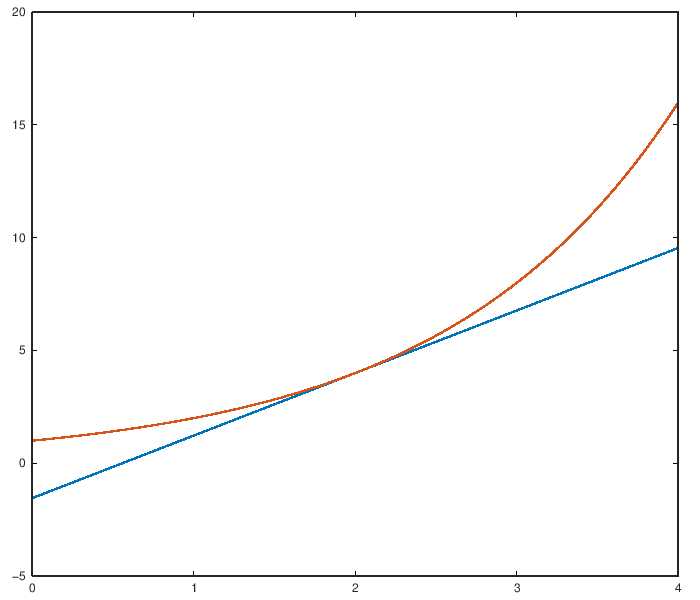

In [39]:
fun=@(x)2.^x;
limits=[0 4 0 6];
plot_tangent([2 fun(2)],2^2*log(2),limits)
plot_function([0,4],fun)

#### Razlika unapred

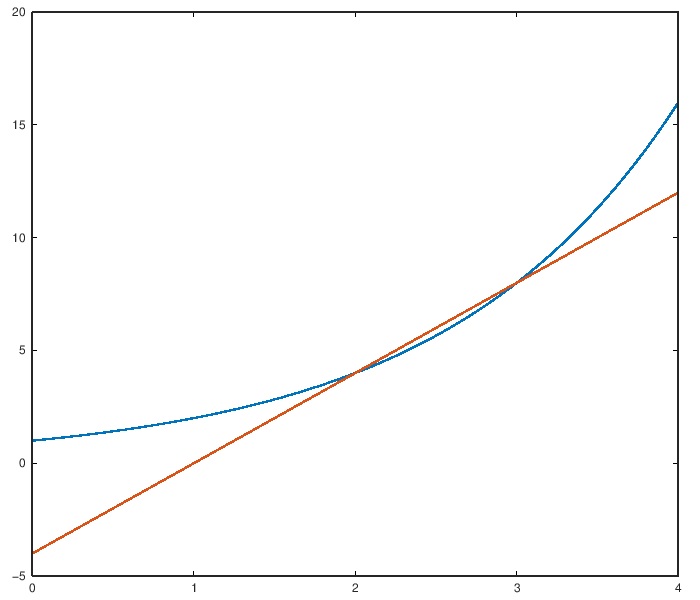

In [40]:
plot_function([0,4],fun)
h=1; %veliko h da bi se bolje videle razlike izmedju anlitickog i numerickog resenja
hold on;
plot_tangent([2 fun(2)],razlika_unapred(2,h,fun),limits)

#### Razlika unazad

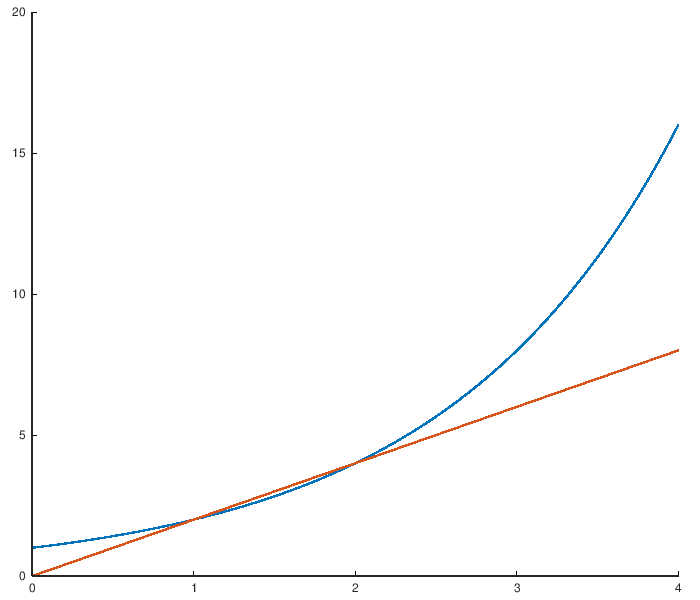

In [41]:
hold on;
plot_function([0,4],fun)
plot_tangent([2 fun(2)],razlika_unazad(2,h,fun),limits)

#### Centralna razlika

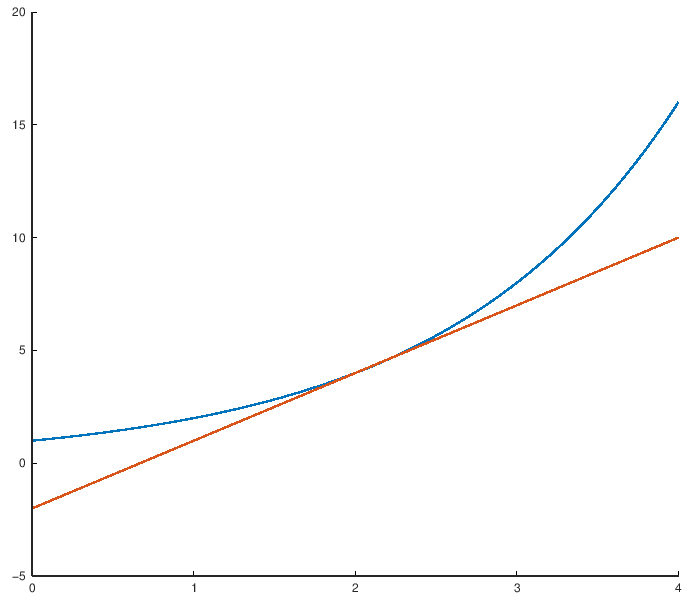

In [42]:
hold on;
plot_function([0,4],fun)
plot_tangent([2 fun(2)],centralna_razlika(2,h,fun),limits)

#### Sve tri konačne razlike i analitičko rešenje

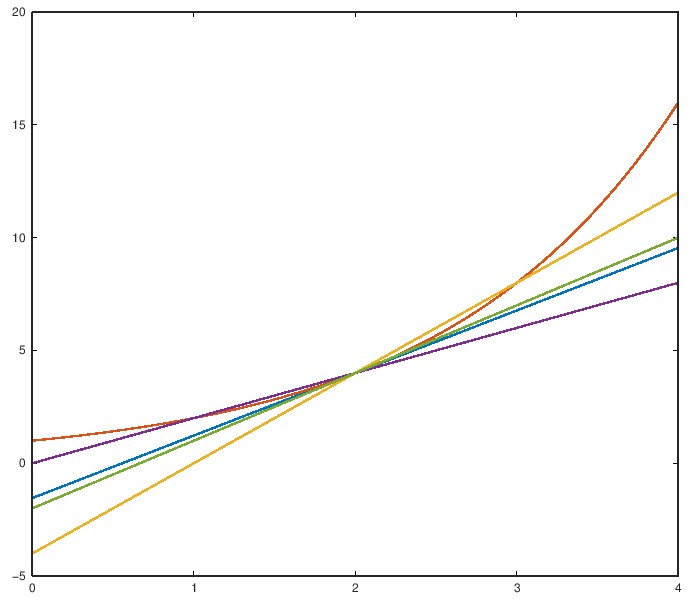

In [43]:
plot_tangent([2 fun(2)],2^2*log(2),limits)
hold on;
plot_function([0,4],fun)
plot_tangent([2 fun(2)],razlika_unapred(2,h,fun),limits, "blue")
plot_tangent([2 fun(2)],razlika_unazad(2,h,fun),limits, "red")
plot_tangent([2 fun(2)],centralna_razlika(2,h,fun),limits, "green")

#### Prikazujemo sada redove grešaka konačnih razlika na primeru koji smo do sada radili. Prvo prikazujemo grešku za razliku unapred, pa za razliku unazad i na kraju za centralnu razliku. Za svaku konačnu razliku prvo crtamo kako greška opada sa smanjenjem $h$, a nakon toga poredimo funkciju sa njenjim redom greške.

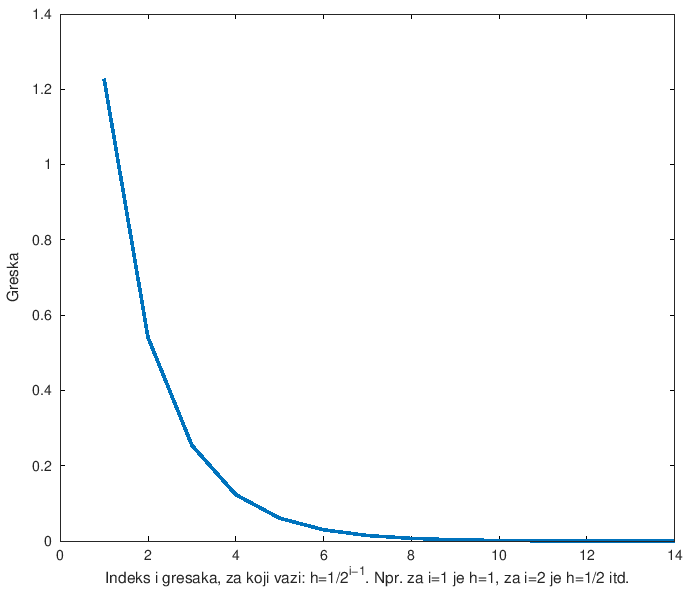

In [44]:
fun=@(x)2.^x;
x0=2;
[errors_runp,sub_intervals]=calculate_error(x0,fun,0.0001,'razlika_unapred',2^2*log(2));

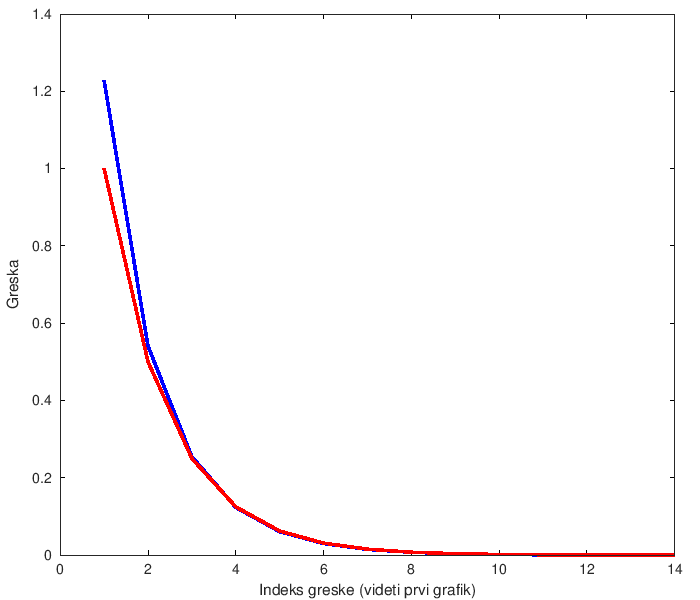

In [47]:
plot(1:length(errors_runp),errors_runp,"linewidth",10,"color","blue")
hold on;
plot(1:length(sub_intervals),sub_intervals.^1,"linewidth",10,"color", "red")
xlabel('Indeks greske (videti prvi grafik)');
ylabel('Greska');
set(gca, "fontsize", 14)

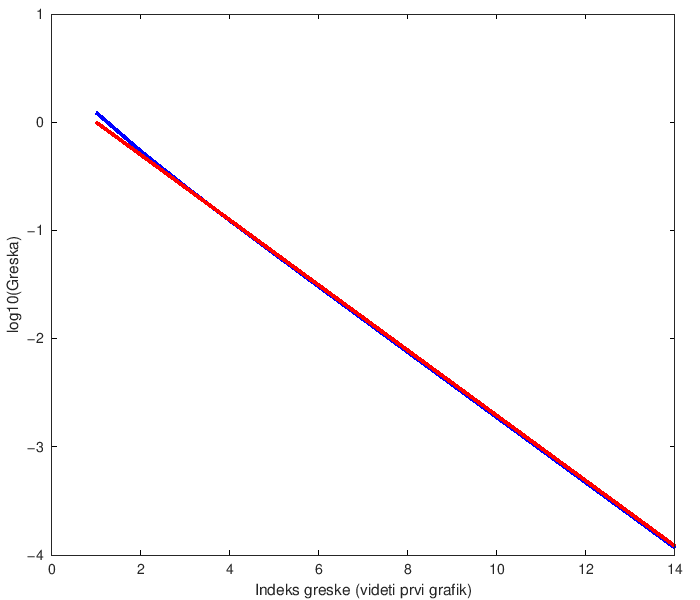

In [48]:
plot(1:length(errors_runp),log10(errors_runp),"linewidth",10,"color","blue")
hold on;
plot(1:length(sub_intervals),log10(sub_intervals.^1),"linewidth",10,"color", "red")
xlabel('Indeks greske (videti prvi grafik)');
ylabel('log10(Greska)');
set(gca, "fontsize", 14)

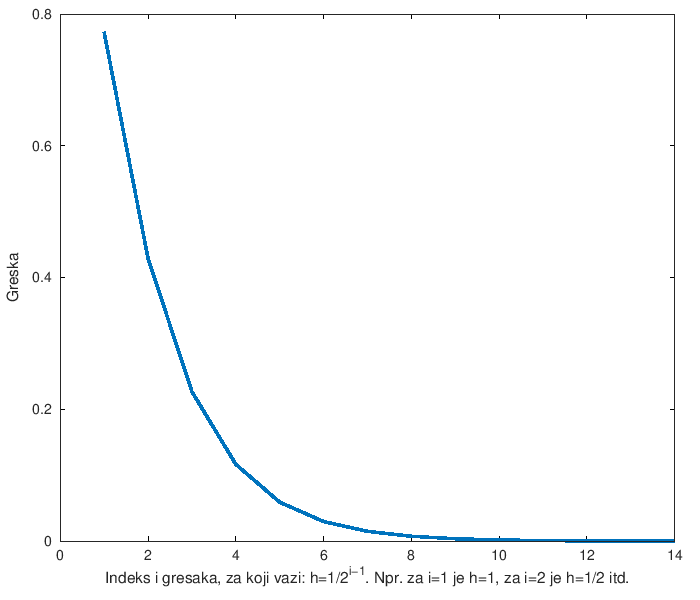

In [19]:
fun=@(x)2.^x;
x0=2;
[errors_runz,sub_intervals]=calculate_error(x0,fun,0.0001,'razlika_unazad',2^2*log(2));

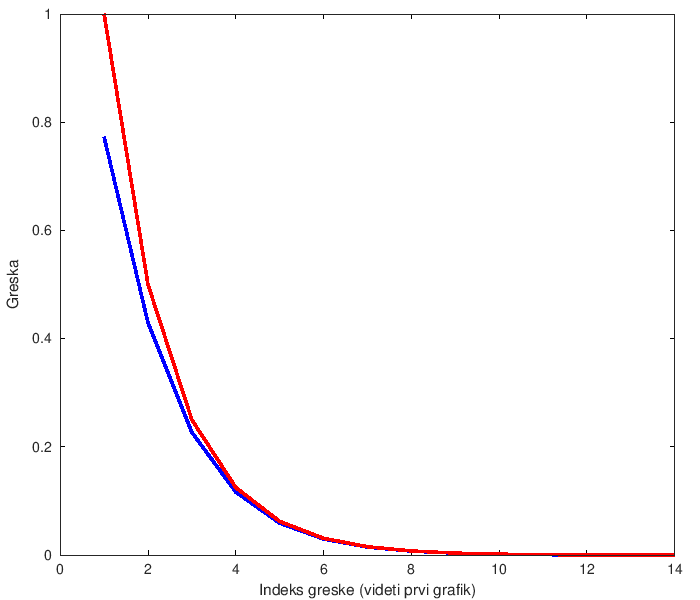

In [20]:
plot(1:length(errors_runz),errors_runz,"linewidth",10,"color","blue")
hold on;
plot(1:length(sub_intervals),sub_intervals.^1,"linewidth",10,"color", "red")
xlabel('Indeks greske (videti prvi grafik)');
ylabel('Greska');
set(gca, "fontsize", 14)

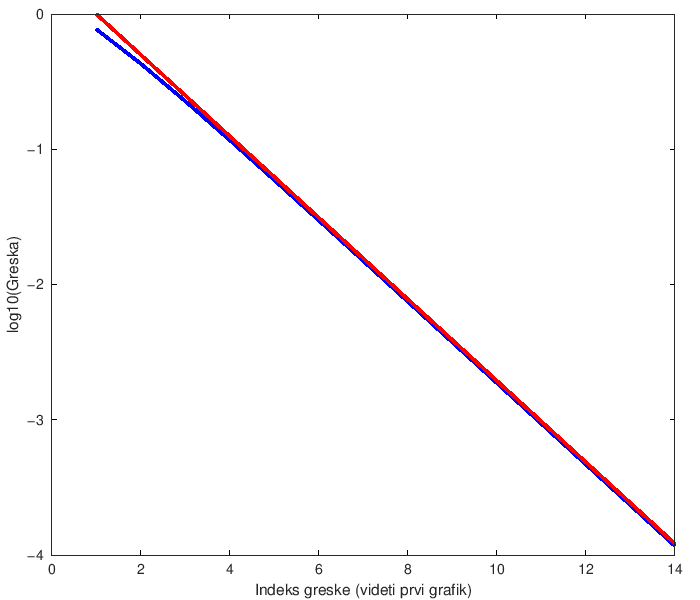

In [21]:
plot(1:length(errors_runz),log10(errors_runz),"linewidth",10,"color","blue")
hold on;
plot(1:length(sub_intervals),log10(sub_intervals.^1),"linewidth",10,"color", "red")
xlabel('Indeks greske (videti prvi grafik)');
ylabel('log10(Greska)');
set(gca, "fontsize", 14)

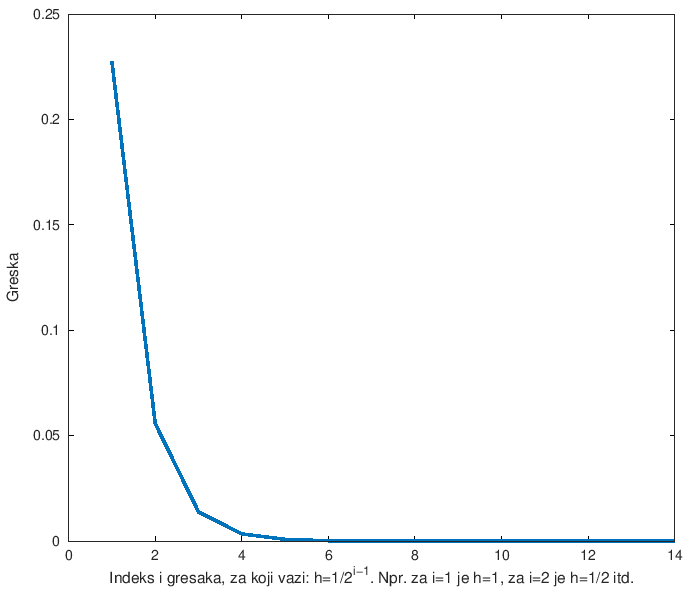

In [22]:
fun=@(x)2.^x;
x0=2;
[errors_rcen,sub_intervals]=calculate_error(x0,fun,0.0001,'centralna_razlika',2^2*log(2));

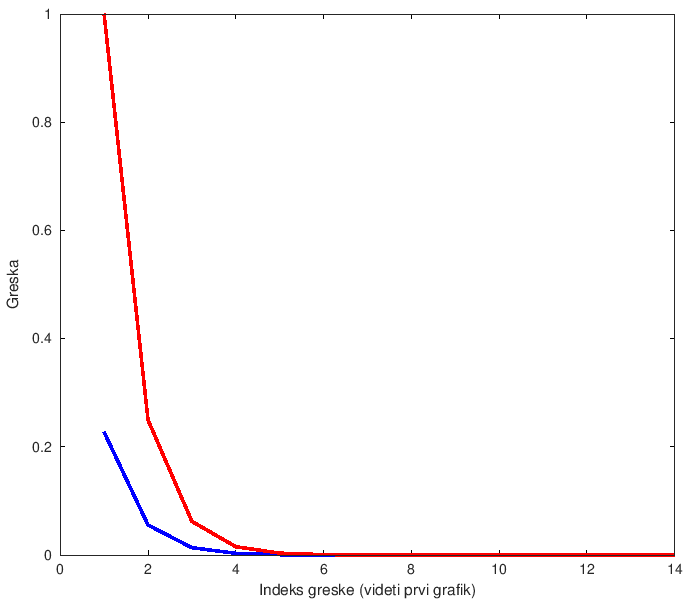

In [50]:
plot(1:length(errors_rcen),errors_rcen,"linewidth",10,"color","blue")
hold on;
plot(1:length(sub_intervals),sub_intervals.^2,"linewidth",10,"color", "red")
xlabel('Indeks greske (videti prvi grafik)');
ylabel('Greska');
set(gca, "fontsize", 14)

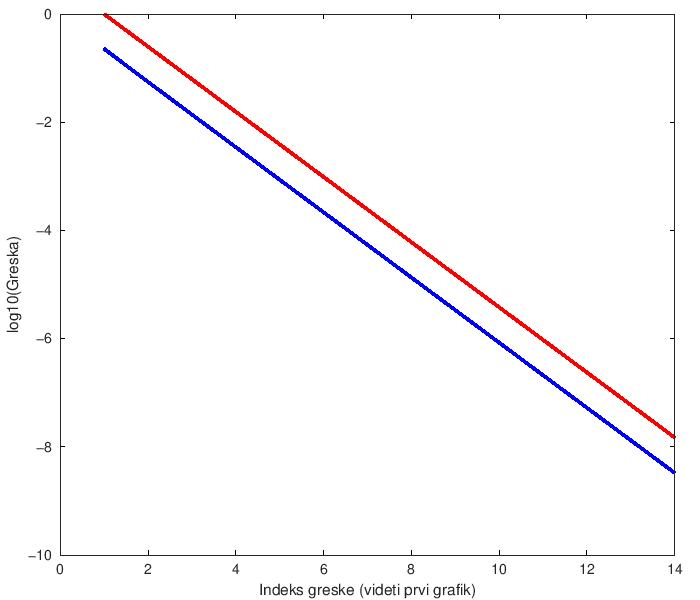

In [51]:
plot(1:length(errors_rcen),log10(errors_rcen),"linewidth",10,"color","blue")
hold on;
plot(1:length(sub_intervals),log10(sub_intervals.^2),"linewidth",10,"color", "red")
xlabel('Indeks greske (videti prvi grafik)');
ylabel('log10(Greska)');
set(gca, "fontsize", 14)

#### Poredimo sve tri konačne razlike i njihove redove grešaka

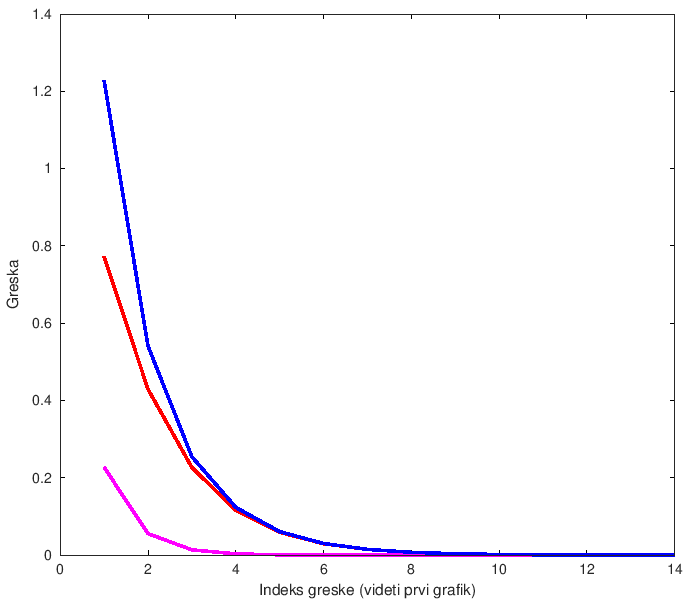

In [28]:
plot(1:length(errors_rcen),errors_rcen,"linewidth",10,"color","magenta")
hold on;
plot(1:length(errors_runz),errors_runz,"linewidth",10,"color", "red")
plot(1:length(errors_runp),errors_runp,"linewidth",10,"color","blue")
xlabel('Indeks greske (videti prvi grafik)');
ylabel('Greska');
set(gca, "fontsize", 14)

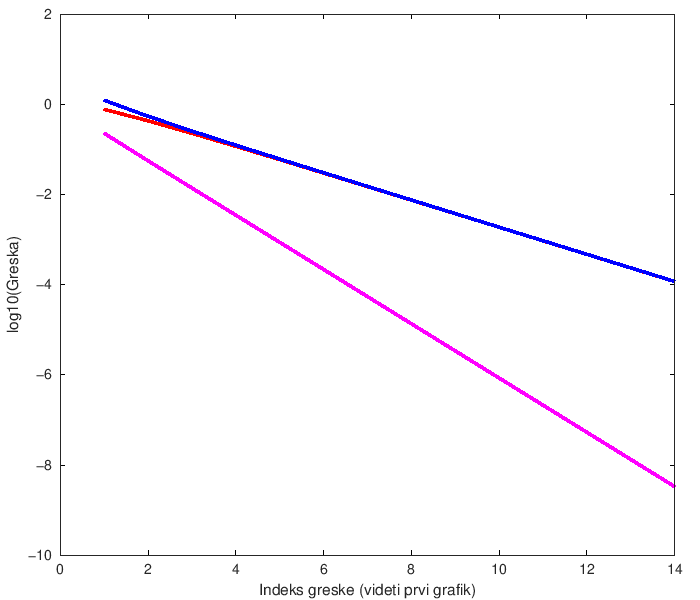

In [29]:
plot(1:length(errors_rcen),log10(errors_rcen),"linewidth",10,"color","magenta")
hold on;
plot(1:length(errors_runz),log10(errors_runz),"linewidth",10,"color", "red")
plot(1:length(errors_runp),log10(errors_runp),"linewidth",10,"color","blue")
xlabel('Indeks greske (videti prvi grafik)');
ylabel('log10(Greska)');
set(gca, "fontsize", 14)

## Konačne razlike za izvode višeg reda
#### Na sličan način kao u slučaju prvog izvoda, izvode se formule i za izvode višeg reda. 
#### Na primer, formula za centralnu razliku za drugi izvod izvodi se na sledeći način:
#### $$f(x_0+h)=f(x_0)+f'(x_0)h+\frac{1}{2}f''(x_0)h^2+\frac{1}{6}f^{(3)}(x_0)h^3+\frac{1}{24}f^{(4)}(x_0)h^4$$
#### $$f(x_0-h)=f(x_0)-f'(x_0)h+\frac{1}{2}f''(x_0)h^2-\frac{1}{6}f^{(3)}(x_0)h^3+\frac{1}{24}f^{(4)}(x_0)h^4$$
#### Sabiramo prethodna dva Tejlorova razvoja:
#### $$f(x_0+h)+f(x_0-h)=2f(x_0)+2\frac{1}{2}f''(x_0)h^2+\frac{1}{24}f^{(4)}(x_0)h^4$$
#### $$f(x_0+h)-2f(x_0)+f(x_0-h)=f''(x_0)h^2+\frac{1}{24}f^{(4)}(x_0)h^4$$
#### $$f''(x_0)=\frac{f(x_0+h)-2f(x_0)+f(x_0-h)}{h^2}+\frac{1}{24}f^{(4)}(x_0)h^2$$
#### Što nam daje formulu:
####  $$f''(x_0)=\frac{f(x_0+h)-2f(x_0)+f(x_0-h)}{h^2}+O(h^2)$$

#### Demonstriraćemo upotrebu centralne razlike za drugi izvod na primeru tela u slobodnom padu. Prvi izvod brzine je ubrzanje. Prvi izvod promene položaja tela je brzina. Iz toga sledi da je drugi izvod položaja tela ubrzanje.
#### Pošto smo u našem primeru postavili otpor vazduha (c) na 0, ubrzanje koje bi trebalo da dobijemo je $9.8\frac{m}{s^2}.$

In [52]:
m = 1; %kg
c = 0; %kg/m
h0 = 100; %m
v0 = 0; %m/s
step = 1; %s
t0 = 0;
t1 = 4;
[time velocity height]=simulate(m,c,v0,h0,t0,t1,step)

time =

   0   1   2   3   4

velocity =

    0.00000    9.80000   19.60000   29.40000   39.20000

height =

   100.0000    90.2000    70.6000    41.2000     2.0000



#### Računamo prvi izvod brzine

In [56]:
height=-height;
n=length(velocity);
step=1;
diff=zeros(1,n-1);
for i=1:n-1
    v_now=velocity(i);
    v_next=velocity(i+1);
    diff(i)=(v_next-v_now)/step;
end
diff

diff =

   9.8000   9.8000   9.8000   9.8000



#### Računamo drugi izvod promene položaja tela

In [57]:
n=length(height);
step=1;
diff=zeros(1,n-1);
for i=2:n-1
    h_before=height(i-1);
    h_now=height(i);
    h_next=height(i+1);
    diff(i)=(h_next-2*h_now+h_before)/step^2;
end
diff

diff =

   0.00000   9.80000   9.80000   9.80000



## Primena Ričardsonove ekstrapolacije na numeričko diferenciranje
#### Kao i kod Rombergove integracije, primenom Ričardsonove ekstrapolacije moguće je kombinovati dve formule manjeg reda tačnosti tako da dobijemo rezultat većeg reda tačnosti.
#### Postupak primene Ričardsonove ekstrapolacije demonstriraćemo pomoću centralne razlike za prvi izvod. 
#### Posmatramo centralnu razliku kao funkciju od koraka $h$, pri čemu su $x$ i $f(x)$ fiksirani:
#### $$\varphi(h)=\frac{f(x+h)-f(x-h)}{2h}+O(h^2)$$
#### Podsedićemo se na koji način smo izveli centralnu razliku da bi se faktori grešaka jasnije videli:
#### $$f(x_0+h)=f(x_0)+f'(x_0)h+\frac{1}{2}f''(x_0)h^2+\frac{1}{6}f^{(3)}(x_0)h^3+\frac{1}{4!}f^{(4)}(x_0)h^4+\frac{1}{5!}f^{(5)}(x_0)h^5$$
#### $$f(x_0-h)=f(x_0)-f'(x_0)h+\frac{1}{2}f''(x_0)h^2-\frac{1}{6}f^{(3)}(x_0)h^3+\frac{1}{4!}f^{(4)}(x_0)h^4-\frac{1}{5!}f^{(5)}(x_0)h^5$$
#### Oduzimamo predhodna dva Tejlorova razvoja:
#### $$f(x_0+h)-f(x_0-h)=2f'(x_0)h+2\frac{1}{6}f^{(3)}(x_0)h^3+2\frac{1}{5!}f^{(5)}(x_0)h^5$$
#### Što nam daje formulu:
#### $$f'(x_0)=\frac{f(x_0+h)-f(x_0-h)}{2h}+\frac{1}{3}f^{(3)}(x_0)h^2+\frac{2}{5!}f^{(5)}(x_0)h^4$$
#### Iz predhodnog možemo da zaključimo da je greška primene centralne razlike oblika:
#### $$f'(x_0)=\frac{f(x_0+h)-f(x_0-h)}{2h}+ah^2+bh^4+ch^6+dh^8+...$$
#### gde su $a,b,c,d...$ konstante.
#### Takođe možemo da zaključimo da je najveći faktor greške reda $h^2$, prvi sledeći $h^4$ itd.
#### To znači da ako pomoću Ričardsonove ekstrapolacije uklonimo najveći faktor greške centralne razlike, dobićemo rezultat formule reda $O(h^4)$
#### Primenjujemo sada Ričardsonovu ekstrapolaciju. Ako su $x$ i $f(x)$ fiksirani pokazali smo da se centralna razlika od tačnog rešenja (prvog izvoda dobijenog analitički) razlikuje za grešku:
#### $$\varphi(h)=f'(x_0)-ah^2-bh^4-ch^6-dh^8-...$$
#### Koristimo sada $\varphi(h)$ i $\varphi(\frac{h}{2})$
#### $$\varphi(h)=f'(x_0)-ah^2-bh^4-...$$
#### $$\varphi\left( \frac{h}{2}\right )=f'(x_0)-a\left( \frac{h}{2}\right )^2-b\left( \frac{h}{2}\right )^4-...$$
#### $$\varphi\left( \frac{h}{2}\right )=f'(x_0)-a\left( \frac{h^2}{4}\right )-b\left( \frac{h^4}{16}\right )-...$$
### Izračunaćemo sada: $\varphi(h)-4\varphi\left( \frac{h}{2}\right )$
#### $$\varphi(h)-4\varphi\left( \frac{h}{2}\right )=f'(x_0)-4f'(x_0)-ah^2+a4\left( \frac{h^2}{4}\right )-b\left( \frac{h}{2}\right )^4+b4\left( \frac{h^4}{16}\right )$$
#### $$\varphi(h)-4\varphi\left( \frac{h}{2}\right )=-3f'(x_0)-b\left( \frac{3}{4} \right)h^4$$
#### $$3f'(x_0)=4\varphi\left( \frac{h}{2}\right )-\varphi(h)-b\left( \frac{3}{4} \right)h^4$$
#### $$f'(x_0)=\frac{4\varphi\left( \frac{h}{2}\right )-\varphi(h)}{3}-O(h^4)$$
#### Dobili smo način da iskombinujemo $\varphi(h)$ i $\varphi(\frac{h}{2})$ tako da dobijemo tačnost reda $O(h^4)$.
#### Na sličan način kao kod robergove integracije možemo da izvedemo formulu za kombinovanje konačnih razlika većeg reda tačnosti.
#### Dakle, ako u $\varphi(h)_{i,j}$ sa $i$ ozаčnimo finoću podele, a sa $j$ kvalitet (kompleksnost metoda) vidimo da je šablon sledeći:
### $$\varphi(h)_{i,j+1}=\frac{4^j\varphi(h)_{i+1,j}-\varphi(h)_{i,j}}{4^{j-1}}$$
#### gde je $i$ red tačnosti metoda, a povećanje $j$ je smanjenje koraka $h$ dva puta.
#### Primenićemo sada Ričardsonovu ekstrapolaciju na primer od ranije:
#### $$f'(2^x)=?\\x=2$$
#### Analitičko rešenje je:
#### $$f'(2^x)=2^x\cdot ln(2)$$
#### $$f'(2)=2^2\cdot ln(2)=2.7726$$
#### Centralna razlika za $h=0.5$:
#### $$f'(x_0)=\frac{f(x_0+h)-f(x_0-h)}{2h}=\frac{2^{2+0.5}-2^{2-0.5}}{2\cdot 0.5}=2.8284$$
#### $$E_R=\Bigl| \frac{2.7726-2.8284}{2.7726}\Bigr| =0.0201=2.01\%$$
#### Koristimo sada $h=0.25$.
#### Centralna razlika
#### $$f'(x_0)=\frac{f(x_0+h)-f(x_0-h)}{2h}=\frac{2^{2+0.25}-2^{2-0.25}}{2\cdot 0.25}=2.7865$$
#### $$E_R=\Bigl| \frac{2.7726-2.7865}{2.7726}\Bigr| =0.005=0.5\%$$
#### Primena Ričardsonove ekstrapolacije
#### $$\frac{4\varphi\left( \frac{h}{2}\right )-\varphi(h)}{3}=\frac{4\cdot 2.7865 - 2.8284}{3}=2.7725$$
#### $$E_R=\Bigl| \frac{2.7726-2.7725}{2.7726}\Bigr| =0.000036=0.0036\%$$
#### Rešenje koje smo dobili ima relativnu grešku od približno $0.0036\%$, što je značajno manje nego $0.5\%$, koliko smo imali za centralnu razliku sa $h=0.25$. U udžbeniku je pokazano da dobijeni rezultat $2.7725$ odgovara rezultatu koji bi se dobio primenom formule za konačnu razliku koja je reda greške $O(h^4)$.
#### U nastavku je dat kod primene Ričardsonove ekstrapolacije na centralnu razliku. Kod je vrlo sličan kodu za Rombergovu integraciju.

In [33]:
function d=diff_ricardson(x0,n,funkcija)
    A=zeros(n,n);
    for i=1:n
        A(i,1)=centralna_razlika(x0,(1/(2^(i-1))),funkcija);
    end
    for j=2:n
        for i=1:(n-j+1)
            A(i,j)=(4^(j-1)*A(i+1,j-1)-A(i,j-1))/((4^(j-1))-1);
        end
    end
    A
    d=A(1,n);
endfunction

In [58]:
fun=@(x)2.^x;
x0=2;
n=5;
d=diff_ricardson(x0,n,fun)

A =

   3.00000   2.77124   2.77259   2.77259   2.77259
   2.82843   2.77251   2.77259   2.77259   0.00000
   2.78649   2.77258   2.77259   0.00000   0.00000
   2.77606   2.77259   0.00000   0.00000   0.00000
   2.77346   0.00000   0.00000   0.00000   0.00000

d =  2.7726


#### Grafički poredimo tačno rešenje i rešenje dobijeno pomoću fukcije *diff_ricardson*.

A =

   3.00000   2.77124   2.77259   2.77259   2.77259
   2.82843   2.77251   2.77259   2.77259   0.00000
   2.78649   2.77258   2.77259   0.00000   0.00000
   2.77606   2.77259   0.00000   0.00000   0.00000
   2.77346   0.00000   0.00000   0.00000   0.00000



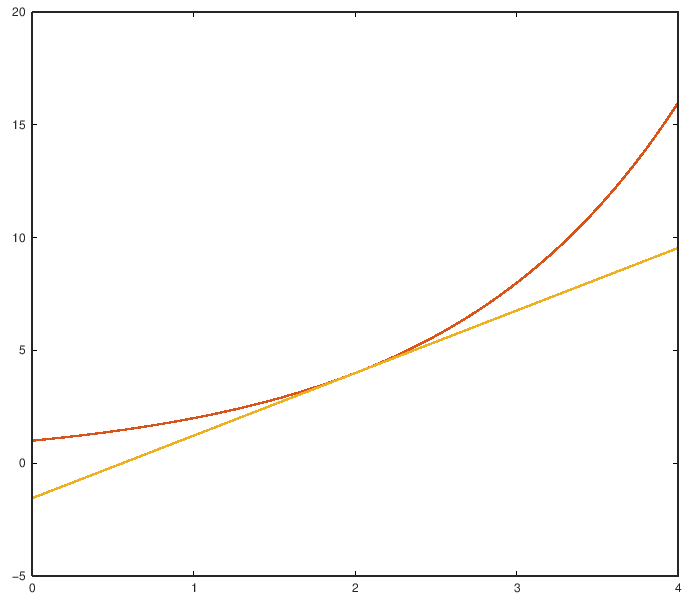

In [59]:
h=1; %veliko h da bi se bolje videle razlike izmedju anlitickog i numerickog resenja
limits=[0 4 0 6];
plot_tangent([2 fun(2)],diff_ricardson(x0,n,fun),limits)
plot_function([0,4],fun)
hold on;
plot_tangent([2 fun(2)],2^2*log(2),limits)

#### Vidimo da nema razlike.